**Most of the ensemble methods had not performed on the provided data although `Voting Classifier` and base model `Logistic Regression` has performed well by applying hyperparameter tuning**

**May be other methods can also perform well by finding appropriate hyperparameter values**

# **1. Import the essential libraries and Load the data**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data into var -> data

data = pd.read_csv('/content/Creditcard_data.csv')

# **2. EDA**

In [ ]:
# printing some rows of data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# checking the shape of data

data.shape

(772, 31)

In [ ]:
# size of the data using size method

data.size

23932

In [ ]:
# getting the information of data such as column names, datatypes, Nullvalues,
# memory usage,etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [ ]:
# checking the number of missing values in dataset


data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# using describe method to get the statistical analysis or behaviour of data

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [ ]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
column_names = data.columns
column_names.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

# **3. Feature Engineering**

In [ ]:
# defining rows, columns for visualization

number_features = len(column_names)
cols = 4
rows = (number_features + cols - 1) // cols

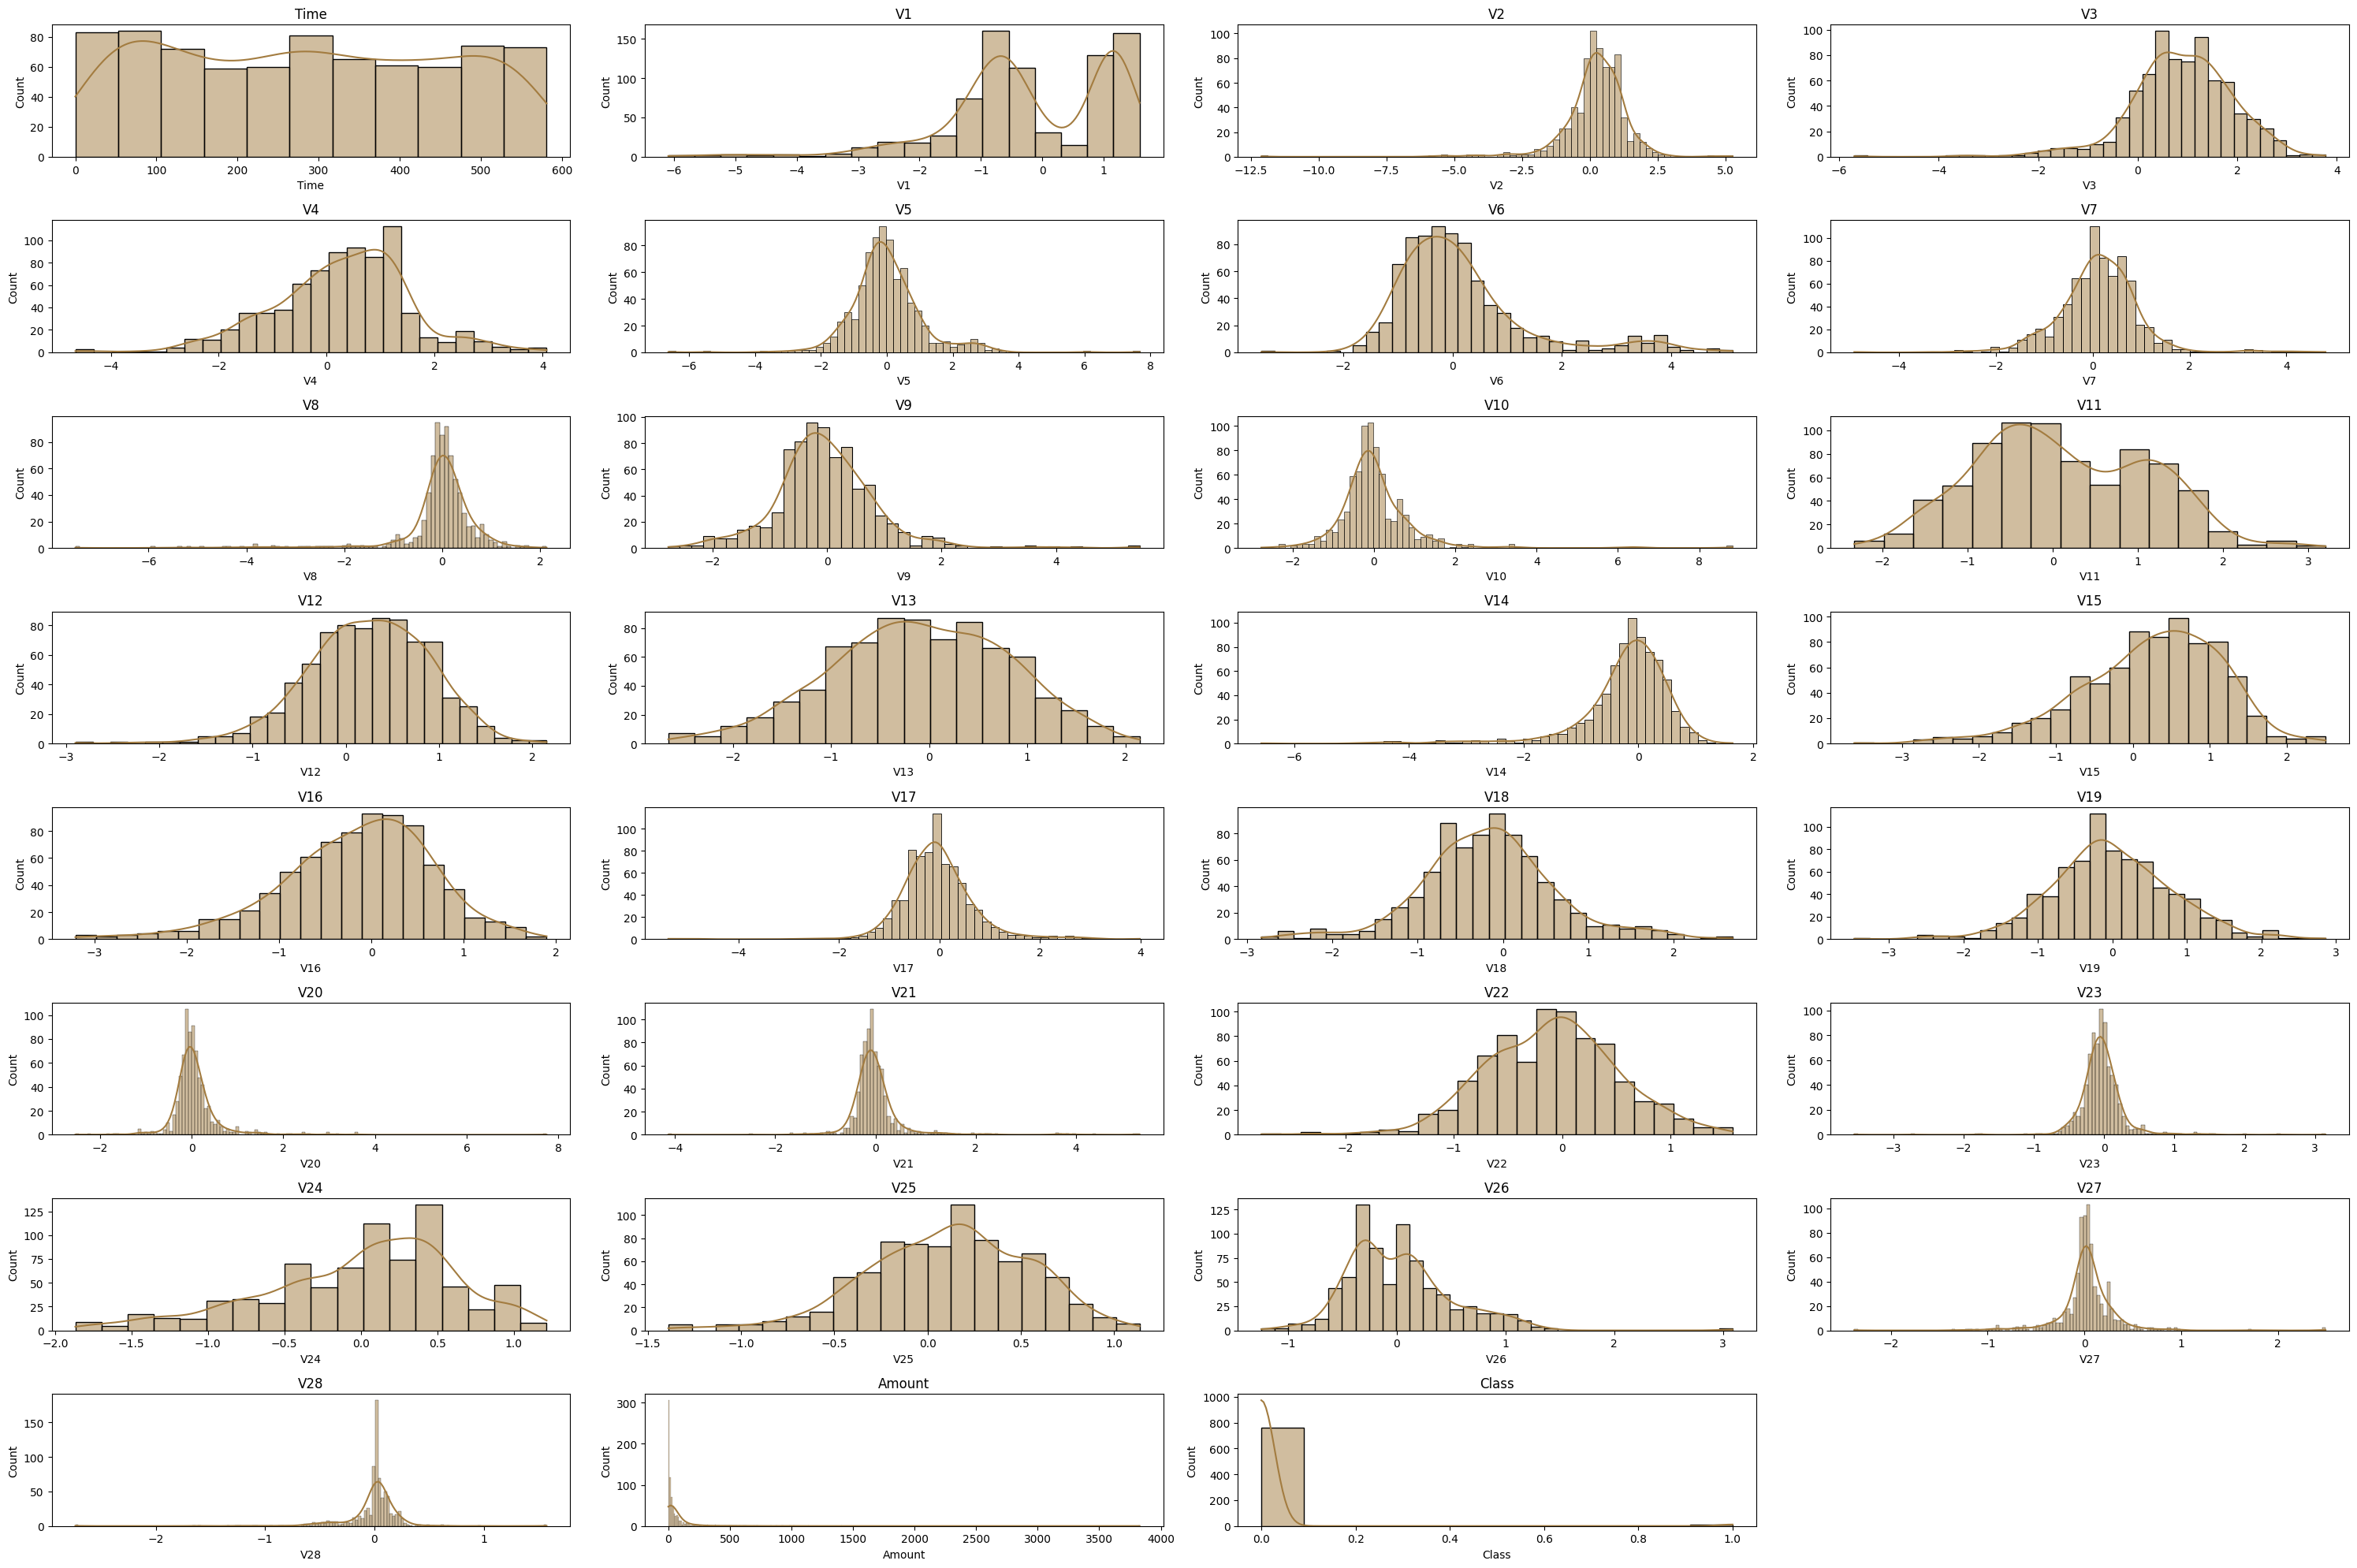

In [ ]:
# using histogram along with kde to understand the data distribution


plt.figure(figsize=(30, 20))

for key, value in enumerate(column_names):
    plt.subplot(rows, cols, key + 1)
    sns.histplot(data=data, x=value, kde=True,color='#a37c40')
    plt.title(value)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

data[['Time_','V1_','V2_','V3_','V4_','V5_','V6_','V7_','V8_','V9_','V10_','V11_','V12_','V13_','V14_','V15_','V16_','V17_','V18_','V19_','V20_','V21_','V22_','V23_','V24_','V25_','V26_','V27_','V28_','Amount_']] = pt.fit_transform(data[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])

array([[<Axes: title={'center': 'Time_'}>,
        <Axes: title={'center': 'V1_'}>, <Axes: title={'center': 'V2_'}>,
        <Axes: title={'center': 'V3_'}>, <Axes: title={'center': 'V4_'}>],
       [<Axes: title={'center': 'V5_'}>, <Axes: title={'center': 'V6_'}>,
        <Axes: title={'center': 'V7_'}>, <Axes: title={'center': 'V8_'}>,
        <Axes: title={'center': 'V9_'}>],
       [<Axes: title={'center': 'V10_'}>,
        <Axes: title={'center': 'V11_'}>,
        <Axes: title={'center': 'V12_'}>,
        <Axes: title={'center': 'V13_'}>,
        <Axes: title={'center': 'V14_'}>],
       [<Axes: title={'center': 'V15_'}>,
        <Axes: title={'center': 'V16_'}>,
        <Axes: title={'center': 'V17_'}>,
        <Axes: title={'center': 'V18_'}>,
        <Axes: title={'center': 'V19_'}>],
       [<Axes: title={'center': 'V20_'}>,
        <Axes: title={'center': 'V21_'}>,
        <Axes: title={'center': 'V22_'}>,
        <Axes: title={'center': 'V23_'}>,
        <Axes: title={'cente

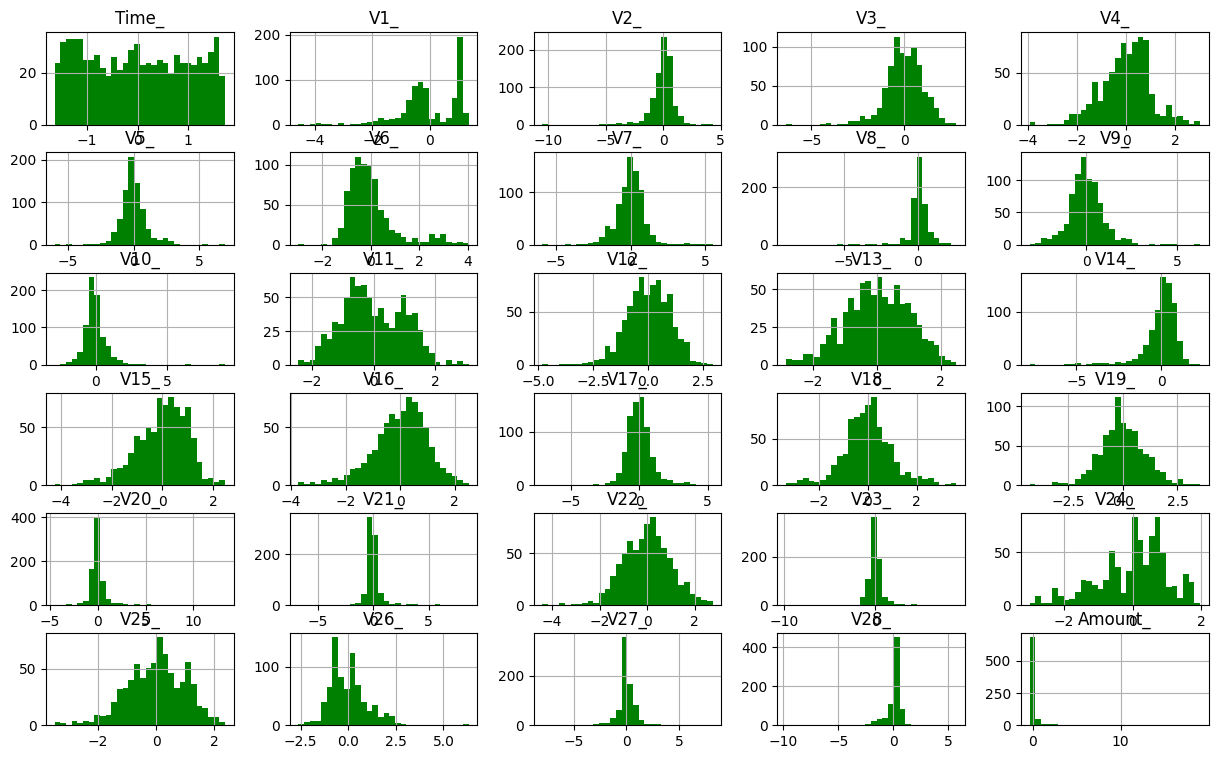

In [ ]:
# checking distribution after apply Power transformation


data[['Time_','V1_','V2_','V3_','V4_','V5_','V6_','V7_','V8_','V9_','V10_','V11_','V12_','V13_','V14_','V15_','V16_','V17_','V18_','V19_','V20_','V21_','V22_','V23_','V24_','V25_','V26_','V27_','V28_','Amount_']].hist(bins=30, figsize=(15, 9),color='green')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20_,V21_,V22_,V23_,V24_,V25_,V26_,V27_,V28_,Amount_
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.323467,-0.038091,0.617686,-0.195625,0.111783,0.033076,-0.437881,0.366449,-0.014410,0.409447
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.232448,-0.378795,-0.892627,0.395078,-0.543138,0.123043,0.213082,-0.107521,0.114215,-0.333712
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.797984,0.399235,1.431487,2.649315,-1.105739,-1.029321,-0.334519,-0.261707,-0.153538,1.567910
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.473472,-0.185878,0.168529,-0.418355,-1.888690,1.241390,-0.505691,0.130911,0.282230,0.277334
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.596017,-0.023514,1.475319,-0.270897,0.231472,-0.746053,0.990903,0.651959,0.834790,0.006685


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_', 'V1_', 'V2_', 'V3_', 'V4_', 'V5_', 'V6_', 'V7_',
       'V8_', 'V9_', 'V10_', 'V11_', 'V12_', 'V13_', 'V14_', 'V15_', 'V16_',
       'V17_', 'V18_', 'V19_', 'V20_', 'V21_', 'V22_', 'V23_', 'V24_', 'V25_',
       'V26_', 'V27_', 'V28_', 'Amount_'],
      dtype='object')

In [ ]:
data.drop(['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'],axis=1,inplace=True)

In [ ]:
data.head()

,Class,Time_,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V8_,...,V20_,V21_,V22_,V23_,V24_,V25_,V26_,V27_,V28_,Amount_
0,0,-1.648034,-0.914180,-0.247263,1.610900,0.868503,-0.303702,0.247620,0.136543,0.188336,...,0.323467,-0.038091,0.617686,-0.195625,0.111783,0.033076,-0.437881,0.366449,-0.014410,0.409447
1,1,-1.648034,1.057914,0.041770,-0.687243,0.129200,0.059272,-0.197113,-0.237378,0.171947,...,-0.232448,-0.378795,-0.892627,0.395078,-0.543138,0.123043,0.213082,-0.107521,0.114215,-0.333712
2,0,-1.642211,-0.913057,-1.328056,0.870859,0.074846,-0.453941,1.340056,0.784631,0.367913,...,0.797984,0.399235,1.431487,2.649315,-1.105739,-1.029321,-0.334519,-0.261707,-0.153538,1.567910
3,0,-1.642211,-0.610030,-0.343153,0.890044,-0.913332,-0.004811,0.888345,0.134206,0.524325,...,-0.473472,-0.185878,0.168529,-0.418355,-1.888690,1.241390,-0.505691,0.130911,0.282230,0.277334
4,0,-1.636388,-0.758390,0.563316,0.653161,0.093332,-0.366460,-0.051563,0.551496,-0.256731,...,0.596017,-0.023514,1.475319,-0.270897,0.231472,-0.746053,0.990903,0.651959,0.834790,0.006685


# **4. Class Imbalance Handling**

In [ ]:
# first get column and analysis how much data is imbalanced

data['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

Text(0, 0.5, 'Count')

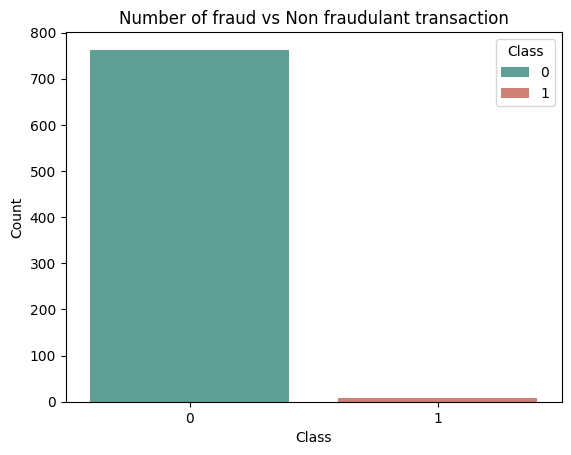

In [ ]:
# representing imbalalanceness through countplot

sns.countplot(x=data['Class'],data=data, hue='Class',palette=['#5A9', '#D76'])
plt.title('Number of fraud vs Non fraudulant transaction')
plt.xlabel('Class')
plt.ylabel('Count')

In [ ]:
# Applying SMOTE oversampling technique

from imblearn.over_sampling import SMOTE

In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
# defining smote

smote = SMOTE()

In [ ]:
# applying smote method then fit_resample on input and target data

X_res,y_res = smote.fit_resample(X,y)

In [ ]:
# checking the imbalanceness after applyng over_sampling technique

y_res.value_counts()

Class
0    763
1    763
Name: count, dtype: int64

<ipython-input-26-84a7ebcf3d37>:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=res_data['Age'],data=res_data,hue='Age',palette=['#2bd0f5',	'#49ff13','#8c92ac'])


<Axes: title={'center': 'Distribution of Age column after Applying SMOTE'}, xlabel='Age', ylabel='count'>

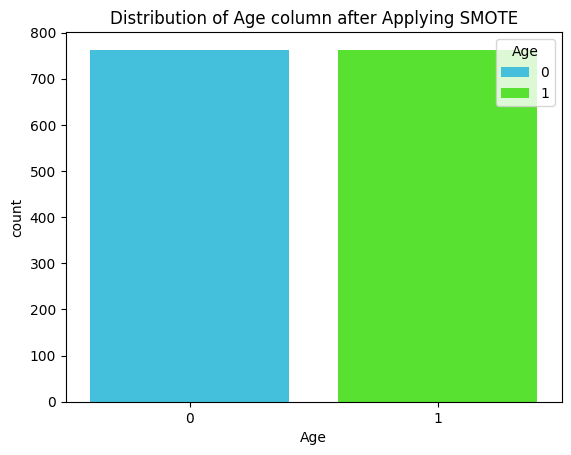

In [ ]:
# visualization

res_data = X_res
res_data['Age'] = y_res

plt.title('Distribution of Age column after Applying SMOTE')
sns.countplot(x=res_data['Age'],data=res_data,hue='Age',palette=['#2bd0f5',	'#49ff13','#8c92ac'])

# **5. Train Test Split**

In [ ]:
# importing train test from sklearn library

from sklearn.model_selection import train_test_split

In [ ]:
# splitting data into 70:30 ratio

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,stratify=y_res)

# **6. Initialize and training Models**

### **Bagging**

**Random Forest**

In [ ]:
# importing Random Forest Classifier from sklearn

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating insatance of RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2'
)

In [ ]:
# training model on data provided

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       min_samples_split=10)

In [ ]:
# making classification on test set

y_pred = rfc.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report,accuracy_score

In [ ]:
print(f1_score(y_test,y_pred))

1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate model performance
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")


Cross-Validation ROC AUC Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean ROC AUC Score: 1.0


**Balanced Random Forest**

In [ ]:
# importing Balcned Random forest from imblearn library

from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# creating insatance of RandomForestClassifier

brfc = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=2, random_state=0,bootstrap=False)

In [ ]:
# training model on data provided

brfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier(bootstrap=False, max_depth=2, random_state=0,
                               replacement=True, sampling_strategy='all')

In [ ]:
# making classification on test set

y_pred = brfc.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print("CLASSIFICATION REPROT : ")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPROT : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       229
           1       0.99      1.00      1.00       229

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred))

Accuracy Score :  0.9956331877729258


In [ ]:
print("Precision Score : ",precision_score(y_test, y_pred))

Precision Score :  0.9913419913419913


In [ ]:
print("F1 Score : ",f1_score(y_test,y_pred))

F1 Score :  0.9956521739130434


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred))

Recall Score :  1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

0.9956331877729258


In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate model performance
cv_scores = cross_val_score(brfc, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Cross-Validation ROC AUC Scores: [1. 1. 1. 1. 1.]
Mean ROC AUC Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

**Easy Ensemble**

In [ ]:
# importing EasyEnsemble from imblearn library

from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
# creating insatance of RandomForestClassifier

eec = EasyEnsembleClassifier(random_state=42)

In [ ]:
# training model on data provided

eec.fit(X_train,y_train)

EasyEnsembleClassifier(random_state=42)

In [ ]:
# making classification on test set

y_pred = eec.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print("CLASSIFICATION REPROT : ")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPROT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       229

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred))

Accuracy Score :  1.0


In [ ]:
print("Precision Score : ",precision_score(y_test, y_pred))

Precision Score :  1.0


In [ ]:
print("F1 Score : ",f1_score(y_test,y_pred))

F1 Score :  1.0


In [ ]:
print("Recall Score : ", recall_score(y_test, y_pred))

Recall Score :  1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

1.0


## **Boosting**

**GradientBoosting**

In [ ]:
# importing GradientBoostingClassifier from sklearn library

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# creating insatance of GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,
    max_depth=5, random_state=42,validation_fraction=0.1)

In [ ]:
# training model on data provided

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=5, random_state=42)

In [ ]:
# making classification on test set

y_pred = gbc.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       229

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



In [ ]:
print(f1_score(y_test,y_pred))

1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate model performance
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")


Cross-Validation ROC AUC Scores: [1. 1. 1. 1. 1.]
Mean ROC AUC Score: 1.0


**AdaBoost**

In [ ]:
# importing AdaBoostClassifier from sklearn library

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# creating insatance of AdaBoostClassifier

ada = AdaBoostClassifier()

In [ ]:
# creating insatance of AdaBoostingClassifier

ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME.R", learning_rate=0.01,random_state=42)

In [ ]:
# training model on data provided

ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=42)

In [ ]:
# making classification on test set

y_pred = ada.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print(f1_score(y_test,y_pred))

1.0


In [ ]:
print(recall_score(y_test, y_pred))

1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

1.0


**XGBoost**

In [ ]:
# importing AdaBoostClassifier from xgboost library

from xgboost import XGBClassifier

In [ ]:
# creating insatance of AdaBoostClassifier

xgb = XGBClassifier()

In [ ]:
# creating insatance of XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
# training model on data provided

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# making classification on test set

y_pred = xgb.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print(f1_score(y_test,y_pred))

1.0


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

1.0


**Logistic Regression - with Regularization**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, class_weight='balanced', C=0.0001)

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print(precision_score(y_test, y_pred))

0.8773946360153256


In [ ]:
print(f1_score(y_test,y_pred))

0.9346938775510204


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

0.9301310043668123


**From the above we can say that all the methods are overfitting but using reguralization technique we can reduce the overfitting as we can see with Logistic Regression**

**SO base model is performing better than ensemble methods**

## **Voting Classifier**

In [ ]:
# importing voting classsifier and SVC

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC



In [ ]:
# Define the imported classifiers or creating instance of them

rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
lrc = LogisticRegression()
svc = SVC(probability=True)



In [ ]:
# Create VotingClassifier - combining the imported classifiers
vc = VotingClassifier(estimators=[('rfc', rfc), ('lr', lrc), ('svc', svc)], voting='soft')

# Fitint the model on the given dataset
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10)),
                             ('lr', LogisticRegression()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
y_test

1375    1
1380    1
1023    1
14      0
131     0
       ..
21      0
1443    1
1001    1
631     0
593     0
Name: Class, Length: 458, dtype: int64

In [ ]:
print(f1_score(y_test,y_pred))

0.9346938775510204


In [ ]:
# AUC ROC

print(roc_auc_score(y_test,y_pred))

0.9301310043668123


## **So voting classifier has also performed better than all other algorithms**